In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('population_by_age_group.csv')

In [10]:
df.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'indic_de', 'geo', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')

In [20]:
df[~df['indic_de'].duplicated()]

,DATAFLOW,LAST UPDATE,freq,indic_de,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 0-14 years,France,2013,18.6,NaN,NaN
12,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 15-24 years,France,2013,12.0,NaN,NaN
24,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 25-49 years,France,2013,32.5,NaN,NaN
36,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 50-64 years,France,2013,19.3,NaN,NaN
48,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 65-79 years,France,2013,11.9,NaN,NaN
60,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 80 years and more,France,2013,5.6,NaN,NaN


In [25]:
df[(df['indic_de'] == 'Proportion of population aged 25-49 years') & (df['TIME_PERIOD'] == 2024)]

,DATAFLOW,LAST UPDATE,freq,indic_de,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
35,ESTAT:TPS00010(1.0),04/12/25 23:00:00,Annual,Proportion of population aged 25-49 years,France,2024,30.3,p,NaN


#### Conclusion
En 2024 hay un 30.3% de la poblacion entre 25 y 49 años en Francia

In [65]:
df2 = pd.read_csv('1JanuaryRegionNUTS2.csv')
df2

,DATAFLOW,LAST UPDATE,freq,unit,age,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TGS00096(1.0),04/12/25 23:00:00,Annual,Number,Total,Total,Nord-Pas de Calais,2024,4069699,p,NaN


In [68]:
NordCalais = round(df2['OBS_VALUE'] * 0.303)
NordCalais

0    1233119.0
Name: OBS_VALUE, dtype: float64

1,233,118 Personas en la region de nord-pas de calais entre 25 y 49 años en francia

https://www.insee.fr/fr/statistiques/1405599?geo=COM-59350

Poblacion de Lille: 238,695

In [69]:
238695/NordCalais

0    0.19357
Name: OBS_VALUE, dtype: float64

Lille tiene 19% de la poblacion en Nord-PasDeCalais

In [40]:
df3 = pd.read_csv('DS_RP_POPULATION_PRINC_2022_data.csv', delimiter=';')

C:\Users\lino_\AppData\Local\Temp\ipykernel_13064\3473346098.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('DS_RP_POPULATION_PRINC_2022_data.csv', delimiter=';')


In [63]:
df3.columns

Index(['AGE', 'GEO', 'GEO_OBJECT', 'RP_MEASURE', 'SEX', 'TIME_PERIOD',
       'OBS_VALUE'],
      dtype='object')

In [57]:
df3['TIME_PERIOD'].value_counts()

TIME_PERIOD
2011    1373542
2016    1373462
2022    1373386
Name: count, dtype: int64

In [70]:
df3[(df3['SEX']=='F') & (df3['AGE'] == 'Y25T39') & (df3['TIME_PERIOD'] == 2022) & (df3['GEO'] == '59350')]

,AGE,GEO,GEO_OBJECT,RP_MEASURE,SEX,TIME_PERIOD,OBS_VALUE
110796,Y25T39,59350,BV2022,POP,F,2022,113857.628403
440316,Y25T39,59350,COM,POP,F,2022,30242.797594


### Conclusion: 
##### Hay 30242 Mujeres entre 25 y 39 en Lille en 2022

Cuantas estan solteras, sin hijos?

In [75]:
# https://www.bien-dans-ma-ville.fr/lille-59350/
Personas_solas = 0.38


In [76]:
Mujeres_solas = 30242*0.38

In [77]:
Mujeres_solas

11491.960000000001

## Mas Datos

https://ville-data.com/nombre-d-habitants/Lille-59-59350

Lille compte 52 % de femmes et 48 % d'hommes

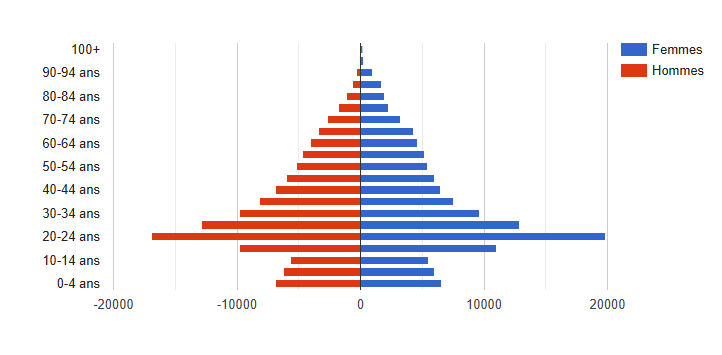

- Mujeres entre 20 y 24 - 19803
- Mujeres enre 25 y 29 - 12900
- Mujeres entre 30 y 34 - 9599

In [ ]:
m20_24 = 19803
m25_29 = 12900
m30_34 = 9599
MujeresTotal= m20_24 + m25_29 +m30_34
print("Del total de mujeres: ")
print("Porcentaje entre 20 y 24: ", round(m20_24/MujeresTotal,2)*100, "%")
print("Porcentaje entre 25 y 29: ", round(m25_29/MujeresTotal,2)*100, "%")
print("Porcentaje entre 30 y 34: ", round(m30_34/MujeresTotal,2)*100, "%")




Del total de mujeres: 
Porcentaje entre 20 y 24 47.0 %
Porcentaje entre 25 y 29 30.0 %
Porcentaje entre 30 y 34 23.0 %


In [97]:
print("Mujeres solas entre 20 y 34 años: ",round(MujeresTotal * Personas_solas))

Mujeres solas entre 20 y 34 años:  16075


In [99]:
print("Mujeres solas entre 20 y 24: ", int(m20_24*Personas_solas))
print("Mujeres solas entre 25 y 29: ", int(m25_29*Personas_solas))
print("Mujeres solas entre 30 y 34: ", int(m30_34*Personas_solas))

mi_estadistica = 1/60

Mujeres solas entre 20 y 24:  7525
Mujeres solas entre 25 y 29:  4902
Mujeres solas entre 30 y 34:  3647


In [100]:
print("Posible pareja entre 20 y 24: ", int(m20_24*mi_estadistica))
print("Posible pareja entre 25 y 29: ", int(m25_29*mi_estadistica))
print("Posible pareja entre 30 y 34: ", int(m30_34*mi_estadistica))

Posible pareja entre 20 y 24:  330
Posible pareja entre 25 y 29:  215
Posible pareja entre 30 y 34:  159


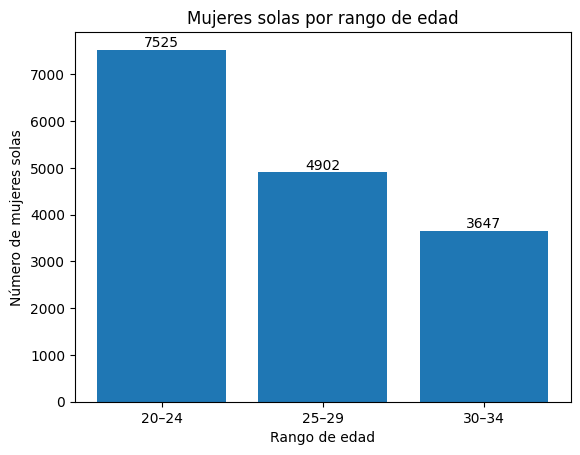

In [96]:
import matplotlib.pyplot as plt

# Etiquetas de los grupos de edad
grupos = ['20–24', '25–29', '30–34']

# Valores calculados
valores = [
    int(m20_24 * Personas_solas),
    int(m25_29 * Personas_solas),
    int(m30_34 * Personas_solas)
]

# Crear el gráfico
plt.figure()
plt.bar(grupos, valores)

# Títulos y etiquetas
plt.title('Mujeres solas por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Número de mujeres solas')

# Mostrar valores encima de cada barra (opcional pero recomendable)
for i, v in enumerate(valores):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()
